## Logic Based FizzBuzz Function [Software 1.0]

In [237]:
import pandas as pd

def fizzbuzz(n):
    
    # Logic Explanation
    if n % 3 == 0 and n % 5 == 0:
        return 'FizzBuzz'
    elif n % 3 == 0:
        return 'Fizz'
    elif n % 5 == 0:
        return 'Buzz'
    else:
        return 'Other'

## Create Training and Testing Datasets in CSV Format

In [238]:
def createInputCSV(start,end,filename):
    
    # Why list in Python?
    # List is a mutable, or changeable, ordered sequence of elements. List allows duplicate items. Lists are great to use when 
    # we want to work with many related values. They enable us to keep data together that belongs together. List is useful 
    # while performing the same methods and operations on multiple values at once.
    inputData   = []
    outputData  = []
    
    # Why do we need training Data?
    # Silimar to human child, machines can also learn from constant feedback from its environment. As the name refers, in order
    # to make the machines learn or to train the machine, we need to feed it some relevant data. When they see enough relevant 
    # data, machines can learn from it.
    for i in range(start,end):
        inputData.append(i)
        outputData.append(fizzbuzz(i))
    
    # Why Dataframe
    # Dataframe in python is a two dimentional data structure that can store data in tabular functions i.e. in form 
    # of row and columns. The input data and labes will be stored in two consecutive columns.
    dataset = {}
    dataset["input"]  = inputData
    dataset["label"] = outputData
    
    # Writing to csv
    pd.DataFrame(dataset).to_csv(filename)
    
    print(filename, "Created!")

## Processing Input and Label Data

In [239]:
def processData(dataset):
    
    # Why do we have to process?
    # we need to process datra in order to transform the input (string) value into binary digits.
    data   = dataset['input'].values
    labels = dataset['label'].values
    
    processedData  = encodeData(data)
    processedLabel = encodeLabel(labels)
    
    return processedData, processedLabel

In [240]:
def encodeData(data):
    
    processedData = []
    
    for dataInstance in data:
        
        # Why do we have number 10?
        # the model we are using here is taking 10 bits of input at a time, that is why we have the number 10
        processedData.append([dataInstance >> d & 1 for d in range(10)])
    
    return np.array(processedData)

In [241]:
from keras.utils import np_utils

def encodeLabel(labels):
    
    processedLabel = []
    
    for labelInstance in labels:
        if(labelInstance == "FizzBuzz"):
            # Fizzbuzz
            processedLabel.append([3])
        elif(labelInstance == "Fizz"):
            # Fizz
            processedLabel.append([1])
        elif(labelInstance == "Buzz"):
            # Buzz
            processedLabel.append([2])
        else:
            # Other
            processedLabel.append([0])

    return np_utils.to_categorical(np.array(processedLabel),4)

## Model Definition

In [246]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard

import numpy as np

input_size = 10
drop_out = 0.2
first_dense_layer_nodes  = 512
second_dense_layer_nodes  = 128
third_dense_layer_nodes  = 4

def get_model():
    
    # Why do we need a model?
    # The term ML model refers to the model artifact that is created by the training process.
    # In machine learning paradigm, model refers to a mathematical expression of model parameters along with input place
    # holders for each prediction, class and action for regression, classification and reinforcement categories respectively.


    # Why use Dense layer and then activation?
    # In a neural network, a dense layer is the layer in which every single nodes are connected to every single nodes of the 
    # previous node, hence making it densely connected.
    # On the other hand activation of a node takes a single number and performs some fixed mathematical operations. Activation
    # functions bring non-linearity into the output neuron. 
    
    # Why use sequential model with layers?
    # sequential model is a model in which all the nodes in a single layer can process information coming from the previous node
    # only, it cannot process any information that comes after. Sequential model is helpful in simpler problems where
    # complexility is low.
    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))

    # Why dropout?
    # Dropout is a technique where neurons are ignored (“dropped-out”), randomly, during training. This means that those neurons
    # will not pass any information forward to the activation layer and there weights also will not be updated in backward pass. 
    # When some neurons are randomly dropped out during training, other neurons will have to step in and handle the
    # representation required to make predictions for the missing neurons. As an effect, the network becomes less sensitive to 
    # the specific weights of the neurons. This results in a network that is capable of better generalization and is less likely
    # to overfit the training data.
    
    model.add(Dropout(drop_out))
    
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('softmax'))
    
    model.add(Dropout(drop_out))
    
    model.add(Dense(third_dense_layer_nodes))
    model.add(Activation('softmax'))
   
    
    # Why Softmax?
    # Softmax activation is basically the normalized exponential probability of class observations. Like the logistic 
    # function, softmax provides us with a categorical output. The output class is generally a probability distribution. 
    # In this project we have four classes, Fizz, Buzz, FizzBuzz and others. Here we have used softmax function as the Activation Function in the Output layer of the Multi Layer
    # Perceptron to ensure that the outputs are probabilities and they add up to 1.
    
    model.summary()
    
    # Why use categorical_crossentropy?
    # when we have multiple class problem, we have to use categorical_crossentropy. Unlike binary_crossentropy, where we will
    # have only two classes (e: spam or not-spam), here we will have more than two classes. 
    model.compile(optimizer='adamax',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# <font color='blue'>Creating Training and Testing Datafiles</font>

In [247]:
# Create datafiles
createInputCSV(101,1001,'training.csv')
createInputCSV(1,101,'testing.csv')

training.csv Created!
testing.csv Created!


# <font color='blue'>Creating Model</font>

In [248]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_83 (Dense)             (None, 512)               5632      
_________________________________________________________________
activation_83 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_46 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_84 (Dense)             (None, 128)               65664     
_________________________________________________________________
activation_84 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_47 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_85 (Dense)             (None, 4)                 516       
__________

# <font color = blue>Run Model</font>

In [249]:
validation_data_split = 0.2
num_epochs = 10000
model_batch_size = 128
tb_batch_size = 32
early_patience = 100

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

# Read Dataset
dataset = pd.read_csv('training.csv')

# Process Dataset
processedData, processedLabel = processData(dataset)
history = model.fit(processedData
                    , processedLabel
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

Train on 720 samples, validate on 180 samples
Epoch 1/10000
720/720 [==============================] - 1s 2ms/step - loss: 1.3799 - acc: 0.4444 - val_loss: 1.3636 - val_acc: 0.5333
Epoch 2/10000
720/720 [==============================] - 0s 87us/step - loss: 1.3560 - acc: 0.5333 - val_loss: 1.3385 - val_acc: 0.5333
Epoch 3/10000
720/720 [==============================] - 0s 95us/step - loss: 1.3332 - acc: 0.5333 - val_loss: 1.3157 - val_acc: 0.5333
Epoch 4/10000
720/720 [==============================] - 0s 91us/step - loss: 1.3120 - acc: 0.5333 - val_loss: 1.2972 - val_acc: 0.5333
Epoch 5/10000
720/720 [==============================] - 0s 90us/step - loss: 1.2941 - acc: 0.5333 - val_loss: 1.2819 - val_acc: 0.5333
Epoch 6/10000
720/720 [==============================] - 0s 103us/step - loss: 1.2802 - acc: 0.5333 - val_loss: 1.2686 - val_acc: 0.5333
Epoch 7/10000
720/720 [==============================] - 0s 113us/step - loss: 1.2691 - acc: 0.5333 - val_loss: 1.2579 - val_acc: 0.5333
E

720/720 [==============================] - 0s 128us/step - loss: 1.1459 - acc: 0.5333 - val_loss: 1.1380 - val_acc: 0.5333
Epoch 120/10000
720/720 [==============================] - 0s 129us/step - loss: 1.1483 - acc: 0.5333 - val_loss: 1.1380 - val_acc: 0.5333
Epoch 121/10000
720/720 [==============================] - 0s 85us/step - loss: 1.1426 - acc: 0.5333 - val_loss: 1.1380 - val_acc: 0.5333
Epoch 122/10000
720/720 [==============================] - 0s 98us/step - loss: 1.1443 - acc: 0.5333 - val_loss: 1.1380 - val_acc: 0.5333
Epoch 123/10000
720/720 [==============================] - 0s 120us/step - loss: 1.1401 - acc: 0.5333 - val_loss: 1.1379 - val_acc: 0.5333
Epoch 124/10000
720/720 [==============================] - 0s 118us/step - loss: 1.1445 - acc: 0.5333 - val_loss: 1.1379 - val_acc: 0.5333
Epoch 125/10000
720/720 [==============================] - 0s 117us/step - loss: 1.1365 - acc: 0.5333 - val_loss: 1.1379 - val_acc: 0.5333
Epoch 126/10000
720/720 [====================

720/720 [==============================] - 0s 108us/step - loss: 1.1377 - acc: 0.5333 - val_loss: 1.1370 - val_acc: 0.5333
Epoch 238/10000
720/720 [==============================] - 0s 126us/step - loss: 1.1412 - acc: 0.5333 - val_loss: 1.1375 - val_acc: 0.5333
Epoch 239/10000
720/720 [==============================] - 0s 109us/step - loss: 1.1386 - acc: 0.5333 - val_loss: 1.1381 - val_acc: 0.5333
Epoch 240/10000
720/720 [==============================] - 0s 106us/step - loss: 1.1419 - acc: 0.5333 - val_loss: 1.1374 - val_acc: 0.5333
Epoch 241/10000
720/720 [==============================] - 0s 94us/step - loss: 1.1372 - acc: 0.5333 - val_loss: 1.1368 - val_acc: 0.5333
Epoch 242/10000
720/720 [==============================] - 0s 98us/step - loss: 1.1400 - acc: 0.5333 - val_loss: 1.1367 - val_acc: 0.5333
Epoch 243/10000
720/720 [==============================] - 0s 130us/step - loss: 1.1342 - acc: 0.5333 - val_loss: 1.1367 - val_acc: 0.5333
Epoch 244/10000
720/720 [====================

Epoch 296/10000
720/720 [==============================] - 0s 109us/step - loss: 1.1232 - acc: 0.5333 - val_loss: 1.1361 - val_acc: 0.5333
Epoch 297/10000
720/720 [==============================] - 0s 132us/step - loss: 1.1277 - acc: 0.5333 - val_loss: 1.1364 - val_acc: 0.5333
Epoch 298/10000
720/720 [==============================] - 0s 110us/step - loss: 1.1324 - acc: 0.5333 - val_loss: 1.1365 - val_acc: 0.5333
Epoch 299/10000
720/720 [==============================] - 0s 144us/step - loss: 1.1278 - acc: 0.5333 - val_loss: 1.1365 - val_acc: 0.5333
Epoch 300/10000
720/720 [==============================] - 0s 106us/step - loss: 1.1238 - acc: 0.5333 - val_loss: 1.1365 - val_acc: 0.5333
Epoch 301/10000
720/720 [==============================] - 0s 109us/step - loss: 1.1231 - acc: 0.5333 - val_loss: 1.1362 - val_acc: 0.5333
Epoch 302/10000
720/720 [==============================] - 0s 126us/step - loss: 1.1234 - acc: 0.5333 - val_loss: 1.1359 - val_acc: 0.5333
Epoch 303/10000
720/720 [==

720/720 [==============================] - 0s 115us/step - loss: 1.1065 - acc: 0.5333 - val_loss: 1.1332 - val_acc: 0.5333
Epoch 356/10000
720/720 [==============================] - 0s 121us/step - loss: 1.1003 - acc: 0.5333 - val_loss: 1.1327 - val_acc: 0.5333
Epoch 357/10000
720/720 [==============================] - 0s 111us/step - loss: 1.1059 - acc: 0.5333 - val_loss: 1.1324 - val_acc: 0.5333
Epoch 358/10000
720/720 [==============================] - 0s 127us/step - loss: 1.1007 - acc: 0.5333 - val_loss: 1.1321 - val_acc: 0.5333
Epoch 359/10000
720/720 [==============================] - 0s 104us/step - loss: 1.0990 - acc: 0.5333 - val_loss: 1.1328 - val_acc: 0.5333
Epoch 360/10000
720/720 [==============================] - 0s 116us/step - loss: 1.1035 - acc: 0.5333 - val_loss: 1.1326 - val_acc: 0.5333
Epoch 361/10000
720/720 [==============================] - 0s 106us/step - loss: 1.0970 - acc: 0.5333 - val_loss: 1.1329 - val_acc: 0.5333
Epoch 362/10000
720/720 [==================

720/720 [==============================] - 0s 84us/step - loss: 1.0453 - acc: 0.5458 - val_loss: 1.1279 - val_acc: 0.5056
Epoch 474/10000
720/720 [==============================] - 0s 101us/step - loss: 1.0466 - acc: 0.5444 - val_loss: 1.1259 - val_acc: 0.4833
Epoch 475/10000
720/720 [==============================] - 0s 117us/step - loss: 1.0472 - acc: 0.5556 - val_loss: 1.1254 - val_acc: 0.4778
Epoch 476/10000
720/720 [==============================] - 0s 118us/step - loss: 1.0374 - acc: 0.5472 - val_loss: 1.1265 - val_acc: 0.4833
Epoch 477/10000
720/720 [==============================] - 0s 88us/step - loss: 1.0203 - acc: 0.5569 - val_loss: 1.1275 - val_acc: 0.4889
Epoch 478/10000
720/720 [==============================] - 0s 120us/step - loss: 1.0381 - acc: 0.5472 - val_loss: 1.1255 - val_acc: 0.4778
Epoch 479/10000
720/720 [==============================] - 0s 136us/step - loss: 1.0450 - acc: 0.5472 - val_loss: 1.1253 - val_acc: 0.4778
Epoch 480/10000
720/720 [====================

720/720 [==============================] - 0s 119us/step - loss: 0.9700 - acc: 0.5778 - val_loss: 1.1060 - val_acc: 0.4833
Epoch 592/10000
720/720 [==============================] - 0s 117us/step - loss: 0.9858 - acc: 0.5778 - val_loss: 1.1052 - val_acc: 0.4833
Epoch 593/10000
720/720 [==============================] - 0s 127us/step - loss: 0.9948 - acc: 0.5736 - val_loss: 1.1046 - val_acc: 0.4889
Epoch 594/10000
720/720 [==============================] - 0s 98us/step - loss: 0.9700 - acc: 0.5819 - val_loss: 1.1042 - val_acc: 0.4889
Epoch 595/10000
720/720 [==============================] - 0s 95us/step - loss: 0.9894 - acc: 0.5806 - val_loss: 1.1025 - val_acc: 0.4944
Epoch 596/10000
720/720 [==============================] - 0s 114us/step - loss: 0.9874 - acc: 0.5875 - val_loss: 1.1004 - val_acc: 0.5000
Epoch 597/10000
720/720 [==============================] - 0s 117us/step - loss: 0.9748 - acc: 0.5681 - val_loss: 1.1061 - val_acc: 0.4833
Epoch 598/10000
720/720 [====================

720/720 [==============================] - 0s 123us/step - loss: 0.9256 - acc: 0.5861 - val_loss: 1.0426 - val_acc: 0.5500
Epoch 710/10000
720/720 [==============================] - 0s 109us/step - loss: 0.9062 - acc: 0.6083 - val_loss: 1.0520 - val_acc: 0.5222
Epoch 711/10000
720/720 [==============================] - 0s 100us/step - loss: 0.9085 - acc: 0.6111 - val_loss: 1.0412 - val_acc: 0.5500
Epoch 712/10000
720/720 [==============================] - 0s 109us/step - loss: 0.8938 - acc: 0.6194 - val_loss: 1.0423 - val_acc: 0.5444
Epoch 713/10000
720/720 [==============================] - 0s 94us/step - loss: 0.9015 - acc: 0.6208 - val_loss: 1.0534 - val_acc: 0.5111
Epoch 714/10000
720/720 [==============================] - 0s 106us/step - loss: 0.9077 - acc: 0.6083 - val_loss: 1.0432 - val_acc: 0.5333
Epoch 715/10000
720/720 [==============================] - 0s 128us/step - loss: 0.8916 - acc: 0.5986 - val_loss: 1.0478 - val_acc: 0.5333
Epoch 716/10000
720/720 [===================

Epoch 768/10000
720/720 [==============================] - 0s 112us/step - loss: 0.8588 - acc: 0.6222 - val_loss: 1.0257 - val_acc: 0.5389
Epoch 769/10000
720/720 [==============================] - 0s 116us/step - loss: 0.8917 - acc: 0.6111 - val_loss: 1.0156 - val_acc: 0.5611
Epoch 770/10000
720/720 [==============================] - 0s 88us/step - loss: 0.8803 - acc: 0.6236 - val_loss: 1.0217 - val_acc: 0.5667
Epoch 771/10000
720/720 [==============================] - 0s 90us/step - loss: 0.8629 - acc: 0.6389 - val_loss: 1.0350 - val_acc: 0.5444
Epoch 772/10000
720/720 [==============================] - 0s 130us/step - loss: 0.9026 - acc: 0.5972 - val_loss: 1.0144 - val_acc: 0.5611
Epoch 773/10000
720/720 [==============================] - 0s 109us/step - loss: 0.8858 - acc: 0.6375 - val_loss: 1.0134 - val_acc: 0.5444
Epoch 774/10000
720/720 [==============================] - 0s 111us/step - loss: 0.8672 - acc: 0.6292 - val_loss: 1.0279 - val_acc: 0.5444
Epoch 775/10000
720/720 [====

720/720 [==============================] - 0s 94us/step - loss: 0.8378 - acc: 0.6542 - val_loss: 0.9939 - val_acc: 0.5667
Epoch 828/10000
720/720 [==============================] - 0s 124us/step - loss: 0.8693 - acc: 0.6375 - val_loss: 1.0055 - val_acc: 0.5500
Epoch 829/10000
720/720 [==============================] - 0s 108us/step - loss: 0.8671 - acc: 0.5958 - val_loss: 1.0022 - val_acc: 0.5611
Epoch 830/10000
720/720 [==============================] - 0s 106us/step - loss: 0.8205 - acc: 0.6458 - val_loss: 1.0028 - val_acc: 0.5556
Epoch 831/10000
720/720 [==============================] - 0s 117us/step - loss: 0.8448 - acc: 0.6264 - val_loss: 1.0126 - val_acc: 0.5611
Epoch 832/10000
720/720 [==============================] - 0s 110us/step - loss: 0.8465 - acc: 0.6167 - val_loss: 0.9920 - val_acc: 0.5667
Epoch 833/10000
720/720 [==============================] - 0s 122us/step - loss: 0.8692 - acc: 0.6056 - val_loss: 0.9888 - val_acc: 0.5667
Epoch 834/10000
720/720 [===================

720/720 [==============================] - 0s 124us/step - loss: 0.8056 - acc: 0.6625 - val_loss: 0.9890 - val_acc: 0.5667
Epoch 887/10000
720/720 [==============================] - 0s 132us/step - loss: 0.8057 - acc: 0.6431 - val_loss: 0.9768 - val_acc: 0.5944
Epoch 888/10000
720/720 [==============================] - 0s 118us/step - loss: 0.8029 - acc: 0.6403 - val_loss: 0.9669 - val_acc: 0.5667
Epoch 889/10000
720/720 [==============================] - 0s 123us/step - loss: 0.8164 - acc: 0.6319 - val_loss: 0.9822 - val_acc: 0.5722
Epoch 890/10000
720/720 [==============================] - 0s 100us/step - loss: 0.8333 - acc: 0.6389 - val_loss: 0.9740 - val_acc: 0.5722
Epoch 891/10000
720/720 [==============================] - 0s 118us/step - loss: 0.8162 - acc: 0.6500 - val_loss: 0.9740 - val_acc: 0.5778
Epoch 892/10000
720/720 [==============================] - 0s 117us/step - loss: 0.7932 - acc: 0.6403 - val_loss: 0.9749 - val_acc: 0.5833
Epoch 893/10000
720/720 [==================

720/720 [==============================] - 0s 105us/step - loss: 0.7945 - acc: 0.6361 - val_loss: 0.9425 - val_acc: 0.5889
Epoch 946/10000
720/720 [==============================] - 0s 119us/step - loss: 0.7714 - acc: 0.6472 - val_loss: 0.9493 - val_acc: 0.5833
Epoch 947/10000
720/720 [==============================] - 0s 102us/step - loss: 0.7968 - acc: 0.6431 - val_loss: 0.9639 - val_acc: 0.5667
Epoch 948/10000
720/720 [==============================] - 0s 118us/step - loss: 0.8015 - acc: 0.6389 - val_loss: 0.9498 - val_acc: 0.5889
Epoch 949/10000
720/720 [==============================] - 0s 121us/step - loss: 0.7828 - acc: 0.6500 - val_loss: 0.9418 - val_acc: 0.5833
Epoch 950/10000
720/720 [==============================] - 0s 114us/step - loss: 0.7772 - acc: 0.6556 - val_loss: 0.9599 - val_acc: 0.5889
Epoch 951/10000
720/720 [==============================] - 0s 111us/step - loss: 0.8066 - acc: 0.6097 - val_loss: 0.9389 - val_acc: 0.5889
Epoch 952/10000
720/720 [==================

Epoch 1063/10000
720/720 [==============================] - 0s 120us/step - loss: 0.7309 - acc: 0.6958 - val_loss: 0.9165 - val_acc: 0.5833
Epoch 1064/10000
720/720 [==============================] - 0s 105us/step - loss: 0.7433 - acc: 0.6847 - val_loss: 0.9151 - val_acc: 0.5889
Epoch 1065/10000
720/720 [==============================] - 0s 105us/step - loss: 0.7186 - acc: 0.7111 - val_loss: 0.9414 - val_acc: 0.5833
Epoch 1066/10000
720/720 [==============================] - 0s 129us/step - loss: 0.7387 - acc: 0.7000 - val_loss: 0.9082 - val_acc: 0.5889
Epoch 1067/10000
720/720 [==============================] - 0s 133us/step - loss: 0.7352 - acc: 0.6903 - val_loss: 0.9015 - val_acc: 0.5833
Epoch 1068/10000
720/720 [==============================] - 0s 114us/step - loss: 0.7311 - acc: 0.6847 - val_loss: 0.9020 - val_acc: 0.6000
Epoch 1069/10000
720/720 [==============================] - 0s 121us/step - loss: 0.7341 - acc: 0.6611 - val_loss: 0.9100 - val_acc: 0.5944
Epoch 1070/10000
720

Epoch 1180/10000
720/720 [==============================] - 0s 94us/step - loss: 0.6573 - acc: 0.7264 - val_loss: 0.8513 - val_acc: 0.6389
Epoch 1181/10000
720/720 [==============================] - 0s 124us/step - loss: 0.6701 - acc: 0.7333 - val_loss: 0.8324 - val_acc: 0.6278
Epoch 1182/10000
720/720 [==============================] - 0s 121us/step - loss: 0.6812 - acc: 0.7250 - val_loss: 0.8302 - val_acc: 0.6333
Epoch 1183/10000
720/720 [==============================] - 0s 133us/step - loss: 0.6874 - acc: 0.7083 - val_loss: 0.8439 - val_acc: 0.6556
Epoch 1184/10000
720/720 [==============================] - 0s 117us/step - loss: 0.6669 - acc: 0.7375 - val_loss: 0.8254 - val_acc: 0.6222
Epoch 1185/10000
720/720 [==============================] - 0s 123us/step - loss: 0.6341 - acc: 0.7556 - val_loss: 0.8269 - val_acc: 0.6278
Epoch 1186/10000
720/720 [==============================] - 0s 123us/step - loss: 0.6607 - acc: 0.7278 - val_loss: 0.8376 - val_acc: 0.6333
Epoch 1187/10000
720/

720/720 [==============================] - 0s 120us/step - loss: 0.5856 - acc: 0.7722 - val_loss: 0.8100 - val_acc: 0.6389
Epoch 1297/10000
720/720 [==============================] - 0s 114us/step - loss: 0.5937 - acc: 0.7681 - val_loss: 0.7956 - val_acc: 0.6389
Epoch 1298/10000
720/720 [==============================] - 0s 112us/step - loss: 0.5897 - acc: 0.7667 - val_loss: 0.7906 - val_acc: 0.6444
Epoch 1299/10000
720/720 [==============================] - 0s 109us/step - loss: 0.6161 - acc: 0.7347 - val_loss: 0.7890 - val_acc: 0.6611
Epoch 1300/10000
720/720 [==============================] - 0s 109us/step - loss: 0.6160 - acc: 0.7500 - val_loss: 0.7858 - val_acc: 0.6667
Epoch 1301/10000
720/720 [==============================] - 0s 87us/step - loss: 0.6040 - acc: 0.7500 - val_loss: 0.7969 - val_acc: 0.6611
Epoch 1302/10000
720/720 [==============================] - 0s 87us/step - loss: 0.6120 - acc: 0.7431 - val_loss: 0.7953 - val_acc: 0.6667
Epoch 1303/10000
720/720 [=============

Epoch 1355/10000
720/720 [==============================] - 0s 118us/step - loss: 0.5639 - acc: 0.7847 - val_loss: 0.7523 - val_acc: 0.6778
Epoch 1356/10000
720/720 [==============================] - 0s 112us/step - loss: 0.5774 - acc: 0.7458 - val_loss: 0.7471 - val_acc: 0.6889
Epoch 1357/10000
720/720 [==============================] - 0s 114us/step - loss: 0.5450 - acc: 0.7833 - val_loss: 0.7475 - val_acc: 0.6944
Epoch 1358/10000
720/720 [==============================] - 0s 114us/step - loss: 0.6140 - acc: 0.7319 - val_loss: 0.7498 - val_acc: 0.6889
Epoch 1359/10000
720/720 [==============================] - 0s 116us/step - loss: 0.5984 - acc: 0.7458 - val_loss: 0.7526 - val_acc: 0.6833
Epoch 1360/10000
720/720 [==============================] - 0s 117us/step - loss: 0.5727 - acc: 0.7611 - val_loss: 0.7555 - val_acc: 0.6833
Epoch 1361/10000
720/720 [==============================] - 0s 116us/step - loss: 0.5698 - acc: 0.7722 - val_loss: 0.7546 - val_acc: 0.6833
Epoch 1362/10000
720

Epoch 1472/10000
720/720 [==============================] - 0s 105us/step - loss: 0.4989 - acc: 0.8000 - val_loss: 0.6526 - val_acc: 0.7389
Epoch 1473/10000
720/720 [==============================] - 0s 122us/step - loss: 0.5404 - acc: 0.7903 - val_loss: 0.6532 - val_acc: 0.7389
Epoch 1474/10000
720/720 [==============================] - 0s 128us/step - loss: 0.4778 - acc: 0.8236 - val_loss: 0.6559 - val_acc: 0.7333
Epoch 1475/10000
720/720 [==============================] - 0s 114us/step - loss: 0.5220 - acc: 0.7958 - val_loss: 0.6643 - val_acc: 0.7333
Epoch 1476/10000
720/720 [==============================] - 0s 110us/step - loss: 0.5073 - acc: 0.7986 - val_loss: 0.6651 - val_acc: 0.7333
Epoch 1477/10000
720/720 [==============================] - 0s 144us/step - loss: 0.5265 - acc: 0.7875 - val_loss: 0.6620 - val_acc: 0.7222
Epoch 1478/10000
720/720 [==============================] - 0s 127us/step - loss: 0.4858 - acc: 0.8319 - val_loss: 0.6553 - val_acc: 0.7389
Epoch 1479/10000
720

Epoch 1589/10000
720/720 [==============================] - 0s 121us/step - loss: 0.4424 - acc: 0.8458 - val_loss: 0.5154 - val_acc: 0.8167
Epoch 1590/10000
720/720 [==============================] - 0s 117us/step - loss: 0.4114 - acc: 0.8417 - val_loss: 0.5178 - val_acc: 0.8222
Epoch 1591/10000
720/720 [==============================] - 0s 92us/step - loss: 0.4453 - acc: 0.8361 - val_loss: 0.5195 - val_acc: 0.8278
Epoch 1592/10000
720/720 [==============================] - 0s 92us/step - loss: 0.4516 - acc: 0.8264 - val_loss: 0.5180 - val_acc: 0.8278
Epoch 1593/10000
720/720 [==============================] - 0s 119us/step - loss: 0.4447 - acc: 0.8292 - val_loss: 0.5235 - val_acc: 0.8333
Epoch 1594/10000
720/720 [==============================] - 0s 136us/step - loss: 0.4604 - acc: 0.8222 - val_loss: 0.5244 - val_acc: 0.8278
Epoch 1595/10000
720/720 [==============================] - 0s 147us/step - loss: 0.4173 - acc: 0.8431 - val_loss: 0.5211 - val_acc: 0.8278
Epoch 1596/10000
720/7

Epoch 1706/10000
720/720 [==============================] - 0s 93us/step - loss: 0.4293 - acc: 0.8292 - val_loss: 0.4485 - val_acc: 0.8611
Epoch 1707/10000
720/720 [==============================] - 0s 109us/step - loss: 0.4284 - acc: 0.8333 - val_loss: 0.4550 - val_acc: 0.8556
Epoch 1708/10000
720/720 [==============================] - 0s 84us/step - loss: 0.3978 - acc: 0.8458 - val_loss: 0.4572 - val_acc: 0.8556
Epoch 1709/10000
720/720 [==============================] - 0s 105us/step - loss: 0.4085 - acc: 0.8514 - val_loss: 0.4572 - val_acc: 0.8500
Epoch 1710/10000
720/720 [==============================] - 0s 116us/step - loss: 0.3934 - acc: 0.8389 - val_loss: 0.4576 - val_acc: 0.8444
Epoch 1711/10000
720/720 [==============================] - 0s 94us/step - loss: 0.3727 - acc: 0.8500 - val_loss: 0.4458 - val_acc: 0.8556
Epoch 1712/10000
720/720 [==============================] - 0s 106us/step - loss: 0.4175 - acc: 0.8403 - val_loss: 0.4430 - val_acc: 0.8500
Epoch 1713/10000
720/72

Epoch 1823/10000
720/720 [==============================] - 0s 96us/step - loss: 0.3587 - acc: 0.8611 - val_loss: 0.4137 - val_acc: 0.8722
Epoch 1824/10000
720/720 [==============================] - 0s 136us/step - loss: 0.3473 - acc: 0.8806 - val_loss: 0.4034 - val_acc: 0.8722
Epoch 1825/10000
720/720 [==============================] - 0s 120us/step - loss: 0.3675 - acc: 0.8667 - val_loss: 0.3962 - val_acc: 0.8833
Epoch 1826/10000
720/720 [==============================] - 0s 116us/step - loss: 0.3706 - acc: 0.8653 - val_loss: 0.3926 - val_acc: 0.8778
Epoch 1827/10000
720/720 [==============================] - 0s 114us/step - loss: 0.3466 - acc: 0.8736 - val_loss: 0.3914 - val_acc: 0.8833
Epoch 1828/10000
720/720 [==============================] - 0s 99us/step - loss: 0.3864 - acc: 0.8486 - val_loss: 0.3933 - val_acc: 0.8833
Epoch 1829/10000
720/720 [==============================] - 0s 105us/step - loss: 0.3487 - acc: 0.8764 - val_loss: 0.3973 - val_acc: 0.8722
Epoch 1830/10000
720/7

720/720 [==============================] - 0s 101us/step - loss: 0.3761 - acc: 0.8347 - val_loss: 0.3926 - val_acc: 0.8778
Epoch 1940/10000
720/720 [==============================] - 0s 115us/step - loss: 0.3651 - acc: 0.8681 - val_loss: 0.3802 - val_acc: 0.8833
Epoch 1941/10000
720/720 [==============================] - 0s 119us/step - loss: 0.3470 - acc: 0.8681 - val_loss: 0.3852 - val_acc: 0.9000
Epoch 1942/10000
720/720 [==============================] - 0s 104us/step - loss: 0.3650 - acc: 0.8542 - val_loss: 0.3942 - val_acc: 0.8833
Epoch 1943/10000
720/720 [==============================] - 0s 97us/step - loss: 0.3442 - acc: 0.8792 - val_loss: 0.3962 - val_acc: 0.8833
Epoch 1944/10000
720/720 [==============================] - 0s 107us/step - loss: 0.2914 - acc: 0.9000 - val_loss: 0.3813 - val_acc: 0.8889
Epoch 1945/10000
720/720 [==============================] - 0s 104us/step - loss: 0.3400 - acc: 0.8722 - val_loss: 0.3816 - val_acc: 0.8833
Epoch 1946/10000
720/720 [============

Epoch 1998/10000
720/720 [==============================] - 0s 107us/step - loss: 0.3950 - acc: 0.8333 - val_loss: 0.3795 - val_acc: 0.8833
Epoch 1999/10000
720/720 [==============================] - 0s 113us/step - loss: 0.3466 - acc: 0.8597 - val_loss: 0.3846 - val_acc: 0.8833
Epoch 2000/10000
720/720 [==============================] - 0s 130us/step - loss: 0.3499 - acc: 0.8708 - val_loss: 0.3884 - val_acc: 0.8722
Epoch 2001/10000
720/720 [==============================] - 0s 90us/step - loss: 0.3850 - acc: 0.8514 - val_loss: 0.3762 - val_acc: 0.8889
Epoch 2002/10000
720/720 [==============================] - 0s 96us/step - loss: 0.3674 - acc: 0.8708 - val_loss: 0.3621 - val_acc: 0.9000
Epoch 2003/10000
720/720 [==============================] - 0s 121us/step - loss: 0.3344 - acc: 0.8625 - val_loss: 0.3603 - val_acc: 0.8889
Epoch 2004/10000
720/720 [==============================] - 0s 91us/step - loss: 0.3727 - acc: 0.8625 - val_loss: 0.3728 - val_acc: 0.8889
Epoch 2005/10000
720/72

720/720 [==============================] - 0s 119us/step - loss: 0.3382 - acc: 0.8736 - val_loss: 0.3528 - val_acc: 0.8944
Epoch 2115/10000
720/720 [==============================] - 0s 107us/step - loss: 0.3555 - acc: 0.8750 - val_loss: 0.3742 - val_acc: 0.8889
Epoch 2116/10000
720/720 [==============================] - 0s 106us/step - loss: 0.3498 - acc: 0.8667 - val_loss: 0.3618 - val_acc: 0.8889
Epoch 2117/10000
720/720 [==============================] - 0s 116us/step - loss: 0.2827 - acc: 0.9014 - val_loss: 0.3556 - val_acc: 0.8944
Epoch 2118/10000
720/720 [==============================] - 0s 131us/step - loss: 0.3581 - acc: 0.8569 - val_loss: 0.3655 - val_acc: 0.8833
Epoch 2119/10000
720/720 [==============================] - 0s 125us/step - loss: 0.3189 - acc: 0.8806 - val_loss: 0.3861 - val_acc: 0.8833
Epoch 2120/10000
720/720 [==============================] - 0s 145us/step - loss: 0.3193 - acc: 0.8819 - val_loss: 0.3806 - val_acc: 0.8889
Epoch 2121/10000
720/720 [===========

# <font color = blue>Training and Validation Graphs</font>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F0E4CD4F28>,
      dtype=object)

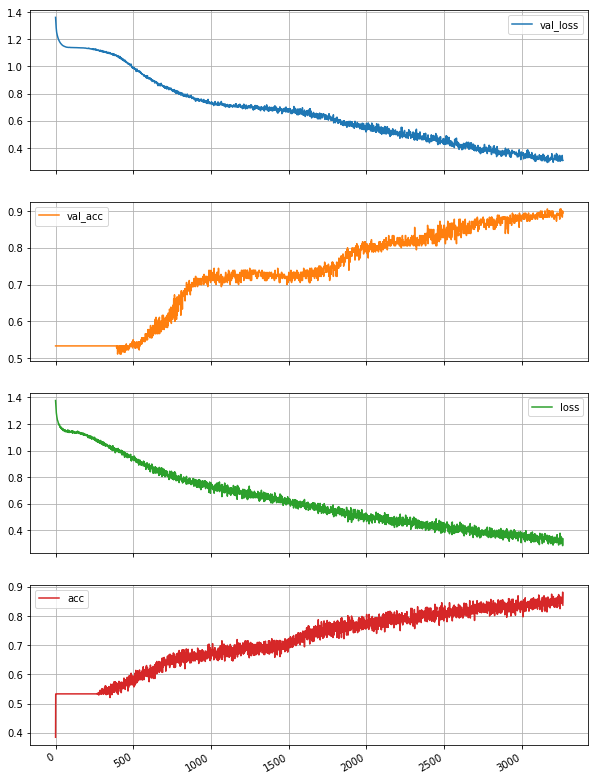

In [236]:
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

# <font color = blue>Testing Accuracy [Software 2.0]</font>

In [234]:
def decodeLabel(encodedLabel):
    if encodedLabel == 0:
        return "Other"
    elif encodedLabel == 1:
        return "Fizz"
    elif encodedLabel == 2:
        return "Buzz"
    elif encodedLabel == 3:
        return "FizzBuzz"

In [235]:
wrong   = 0
right   = 0

testData = pd.read_csv('testing.csv')

processedTestData  = encodeData(testData['input'].values)
processedTestLabel = encodeLabel(testData['label'].values)
predictedTestLabel = []

for i,j in zip(processedTestData,processedTestLabel):
    y = model.predict(np.array(i).reshape(-1,10))
    predictedTestLabel.append(decodeLabel(y.argmax()))
    
    if j.argmax() == y.argmax():
        right = right + 1
    else:
        wrong = wrong + 1

print("Errors: " + str(wrong), " Correct :" + str(right))

print("Testing Accuracy: " + str(right/(right+wrong)*100))

# Please input your UBID and personNumber 
testDataInput = testData['input'].tolist()
testDataLabel = testData['label'].tolist()

testDataInput.insert(0, "UBID")
testDataLabel.insert(0, "sagnikgh")

testDataInput.insert(1, "personNumber")
testDataLabel.insert(1, "50289151")

predictedTestLabel.insert(0, "")
predictedTestLabel.insert(1, "")

output = {}
output["input"] = testDataInput
output["label"] = testDataLabel

output["predicted_label"] = predictedTestLabel

opdf = pd.DataFrame(output)
opdf.to_csv('output.csv')

Errors: 9  Correct :91
Testing Accuracy: 91.0
